<a href="https://colab.research.google.com/github/RitaDCassia/CNN/blob/main/poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribuição de Poisson

A distribuição de Poisson é uma distribuição discreta usada para modelar o número de eventos que ocorrem em um intervalo fixo de tempo ou espaço, dado que os eventos ocorrem independentemente.


**Fórmula da Distribuição de Poisson**

A probabilidade de observar 𝑘 eventos, dado o parâmetro 𝜆 (média de eventos), é:

$$P(k; \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}$$

- 𝜆: Taxa média de eventos por intervalo.
- 𝑘: Número de eventos observados (inteiro não negativo).

**Características**

1. **Média (x̄ ou μ):**
   $$\mu = \lambda$$

2. **Variância (σ²):**
   $$\sigma^2 = \lambda$$


**Exemplo na prática**

Uma aplicação comum da distribuição de Poisson seria modelar o número de chamadas recebidas por uma central de atendimento por minuto.



#Gerando uma População com Distribuição de Poisson

Começamos criando uma população grande o suficiente para representar uma distribuição de Poisson, com
𝜆 = 5.00

In [12]:
# imports nescessários
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [13]:
# Parâmetros da população
np.random.seed(42)  # Reprodutibilidade
population_lambda = 5.00  # Média (lambda) da distribuição de Poisson
population_size = 100000  # Tamanho da população

In [14]:
# Gerando a população
population = np.random.poisson(lam=population_lambda, size=population_size)

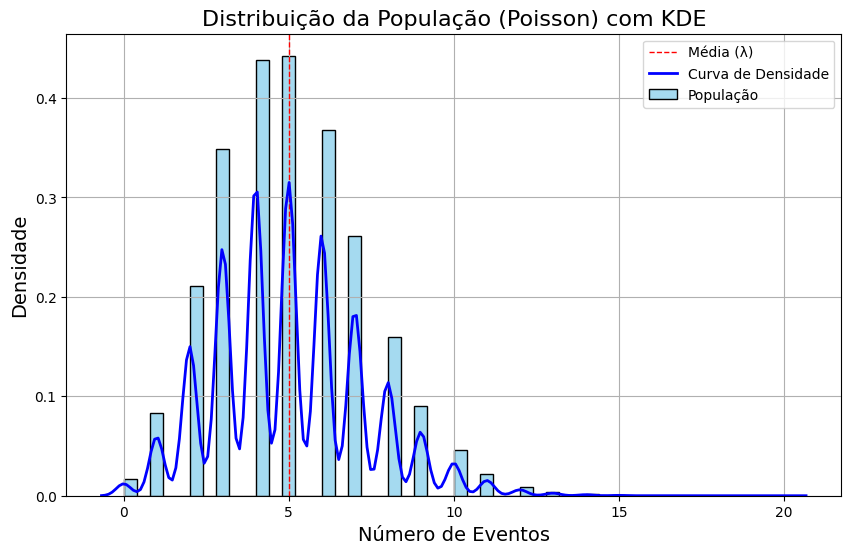

In [17]:
# Plotando a distribuição da população
plt.figure(figsize=(10, 6))  # Aumenta o tamanho da figura
sns.histplot(population, bins=50, kde=False, color="skyblue", label="População", stat="density")  # Usando densidade
plt.title("Distribuição da População (Poisson) com KDE", fontsize=16)
plt.xlabel("Número de Eventos", fontsize=14)
plt.ylabel("Densidade", fontsize=14)
plt.axvline(population_lambda, color='red', linestyle='dashed', linewidth=1, label='Média (λ)')  # Linha da média

# Adicionando a curva de densidade
sns.kdeplot(population, color='blue', linewidth=2, label='Curva de Densidade')  # Curva de densidade

plt.legend()
plt.grid(True)  # Adiciona grade
plt.show()

 # Aplicando o teorema do limite central

**Passo 1: Extração de Amostras**

Extraímos várias amostras da população, calculamos suas médias e analisamos como essas médias são distribuídas.

**Passo 2: Tamanhos de Amostras**

Usamos tamanhos de amostra
𝑛 = 5, 10, 30, 50 para observar como o tamanho da amostra afeta a distribuição das médias.

In [18]:
# Função para visualizar o TCL
def visualizar_tcl(sample_sizes, n_samples=1000):
    plt.figure(figsize=(15, 10))
    for i, n in enumerate(sample_sizes, 1):
        # Gerando médias das amostras
        sample_means = [np.mean(np.random.choice(population, size=n, replace=False)) for _ in range(n_samples)]

        # Subplot para cada tamanho de amostra
        plt.subplot(2, len(sample_sizes)//2, i)
        sns.histplot(sample_means, bins=30, kde=True, color="orange")

        # Calculando a média e o desvio padrão
        mu, sigma = np.mean(sample_means), np.std(sample_means)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

        # Plotando a PDF normal teórica
        plt.plot(x, norm.pdf(x, loc=mu, scale=sigma) * n_samples, label="PDF Normal", color="red")
        plt.title(f"Tamanho da Amostra = {n}")
        plt.xlabel("Média")
        plt.ylabel("Frequência")
        plt.legend()

    plt.tight_layout()
    plt.show()

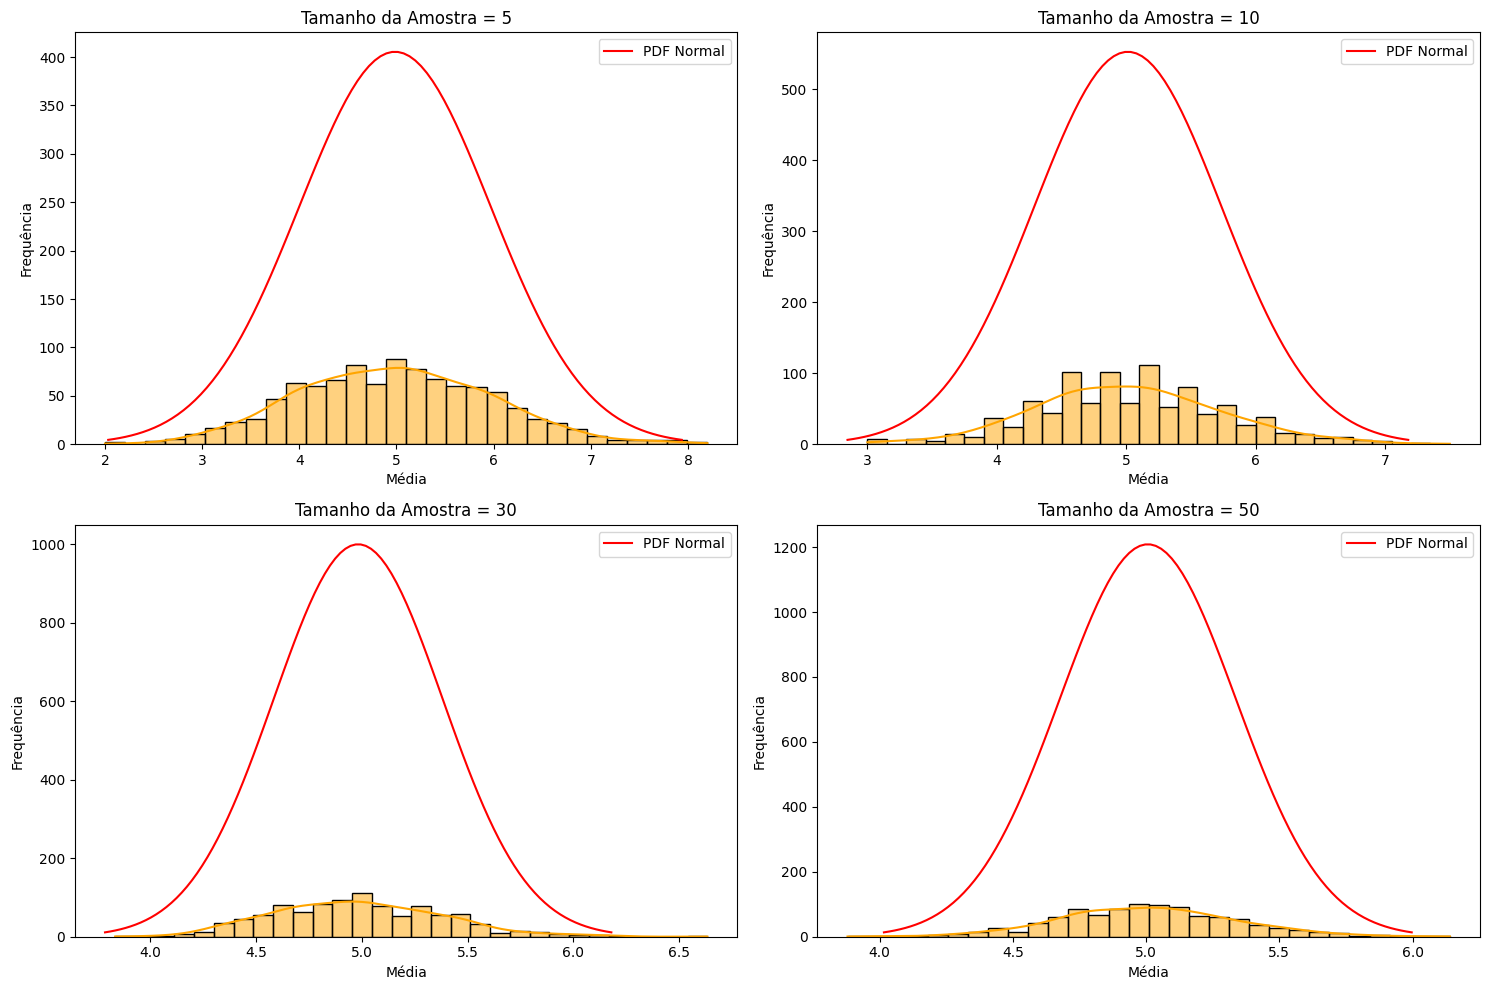

In [19]:
# Testando o TCL para diferentes tamanhos de amostra
sample_sizes = [5, 10, 30, 50]
visualizar_tcl(sample_sizes)